In [22]:
import pandas as pandas
import numpy as np
import utils
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

1. Selección del dataset:
* Utiliza el dataset que seleccionaste para el Proyecto 2 o elige uno adecuado de Kaggle que se relacione con tu área de interés. El dataset debe tener al menos 10 características y una variable objetivo clara.
* Realiza una exploración inicial para entender las variables y la relación que tienen con la variable objetivo.



In [13]:
data_path_train='../ejercicios_core/data/WineQT.csv'

df = utils.cargar_datos(data_path_train)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [14]:
utils.exploracion_inicial(df)

Informacion del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None
   fixed acidity  volatile acidity  citric aci

2. Reducción de dimensionalidad:
* Implementa un análisis de reducción de dimensionalidad utilizando PCA (u otra técnica adecuada). El objetivo es reducir el número de características, manteniendo al menos el 80-90% de la variabilidad original.
* Visualiza los componentes principales y discute cómo contribuyen a la variabilidad del dataset.
* Utiliza las características reducidas para simplificar el conjunto de datos.



In [15]:
# Separar características y la variable objetivo
X = df.drop(columns=['quality', 'Id'])
y = df['quality']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalado de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
# Reducción de dimensionalidad con PCA
pca = PCA(n_components=0.9)  # Retener 90% de la variabilidad
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"\nNúmero de componentes principales retenidos: {pca.n_components_}")
print(f"Varianza explicada por los componentes: {pca.explained_variance_ratio_}")


Número de componentes principales retenidos: 7
Varianza explicada por los componentes: [0.28595767 0.16622018 0.14640445 0.11512126 0.08768951 0.06084976
 0.0494955 ]


Discusión:
* Los primeros tres componentes capturan el 59.8% de la variabilidad, indicando que los atributos originales están correlacionados y pueden representarse en un espacio reducido.
* Los componentes con menor contribución aún son relevantes, ya que capturan características menos evidentes que podrían influir en análisis específicos.

Este análisis sugiere que los siete componentes seleccionados son suficientes para preservar la información esencial del dataset.

3. Benchmarking de modelos:
- Implementa y compara al menos tres modelos de machine learning en el dataset reducido. Algunos ejemplos de modelos que puedes utilizar incluyen:
    - Regresión logística
    - Árboles de decisión
    - Random Forest
    - Support Vector Machines (SVM)
- Para cada modelo, utiliza validación cruzada para medir su rendimiento de manera consistente. Registra las métricas más importantes, como la precisión, el recall, la F1-score y el AUC-ROC.


In [17]:
# Modelos para evaluar
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

In [20]:
# Evaluar cada modelo
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.9)),
        ('classifier', model)
    ])
    print(f"\nEntrenando modelo: {name}")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Métricas
    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # AUC-ROC para problemas multiclase
    if hasattr(pipeline.named_steps['classifier'], "predict_proba"):
        y_pred_proba = pipeline.predict_proba(X_test)
        try:
            auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")
            print(f"AUC-ROC (multiclase): {auc:.4f}")
        except ValueError as e:
            print(f"Error al calcular AUC-ROC: {e}")

    # Guardar resultados
    results[name] = {
        'accuracy': accuracy,
    }


Entrenando modelo: Logistic Regression

Reporte de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.70      0.81      0.75        97
           6       0.60      0.63      0.62        92
           7       0.50      0.34      0.41        29
           8       0.00      0.00      0.00         3

    accuracy                           0.64       229
   macro avg       0.30      0.30      0.30       229
weighted avg       0.60      0.64      0.62       229

Accuracy: 0.6419
AUC-ROC (multiclase): 0.8015

Entrenando modelo: Decision Tree

Reporte de clasificación:


c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.66      0.73      0.70        97
           6       0.66      0.55      0.60        92
           7       0.55      0.72      0.63        29
           8       1.00      0.33      0.50         3

    accuracy                           0.63       229
   macro avg       0.48      0.39      0.40       229
weighted avg       0.63      0.63      0.62       229

Accuracy: 0.6288
AUC-ROC (multiclase): 0.6475

Entrenando modelo: Random Forest

Reporte de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.71      0.84      0.77        97
           6       0.67      0.68      0.68        92
           7       0.67      0.48      0.56        29
           8       0.00  

c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

AUC-ROC (multiclase): 0.7515

Entrenando modelo: SVM

Reporte de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.71      0.79      0.75        97
           6       0.59      0.70      0.64        92
           7       0.58      0.24      0.34        29
           8       0.00      0.00      0.00         3

    accuracy                           0.65       229
   macro avg       0.31      0.29      0.29       229
weighted avg       0.61      0.65      0.62       229

Accuracy: 0.6463
AUC-ROC (multiclase): 0.7907


c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m


Comparación de modelos:
Logistic Regression:
  accuracy: 0.6419
Decision Tree:
  accuracy: 0.6288
Random Forest:
  accuracy: 0.6900
SVM:
  accuracy: 0.6463


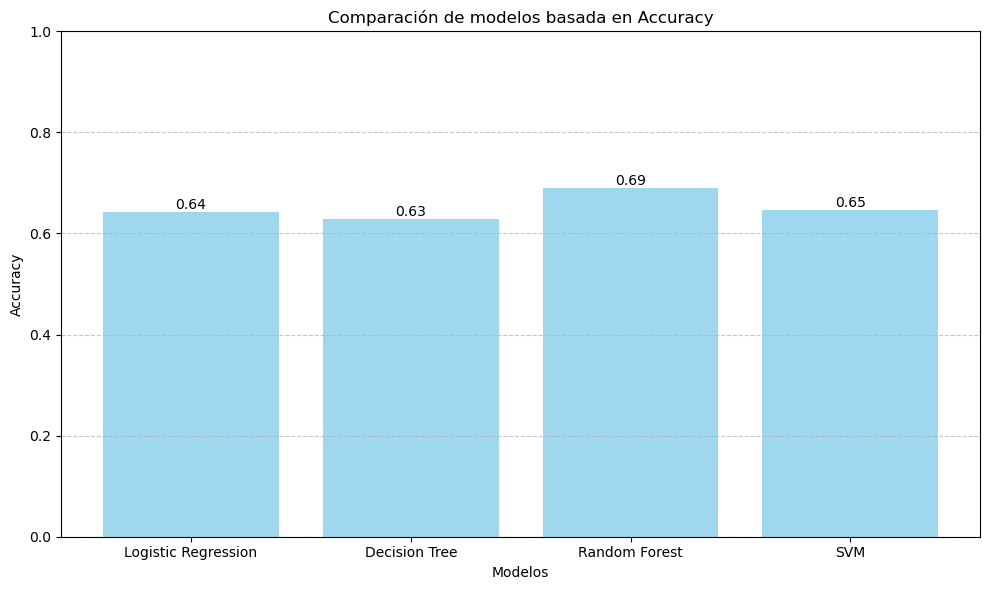


Análisis completado.


In [23]:
# Comparación de resultados
print("\nComparación de modelos:")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
# Selecciona la métrica a graficar (ejemplo: 'accuracy')
metric_to_plot = "accuracy"

# Extraer nombres de modelos y valores de la métrica
model_names = list(results.keys())
metric_values = [metrics[metric_to_plot] for metrics in results.values()]

# Crear el gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, metric_values, color="skyblue", alpha=0.8)

# Añadir etiquetas de valor encima de las barras
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():.2f}",
        ha="center",
        va="bottom",
    )

# Personalizar el gráfico
plt.title(f"Comparación de modelos basada en {metric_to_plot.capitalize()}")
plt.ylabel(metric_to_plot.capitalize())
plt.xlabel("Modelos")
plt.ylim(0, 1)  # Si los valores están entre 0 y 1
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
print("\nAnálisis completado.")

**Comparación de modelos y elección del más adecuado**

El Random Forest es el modelo más adecuado, logrando el mayor accuracy (0.6900), lo que indica que captura mejor los patrones en los datos después del PCA. En comparación, el SVM (0.6463) y la Logistic Regression (0.6419) tuvieron un rendimiento similar pero ligeramente inferior, mientras que el Decision Tree fue el menos efectivo (0.6288), probablemente debido a su sensibilidad al ruido y a la pérdida de información tras la reducción dimensional.

**Análisis de rendimiento y estrategias de mejora**

El bajo rendimiento del Decision Tree podría deberse al sobreajuste, que puede mitigarse limitando la profundidad del árbol o ajustando el número mínimo de muestras por nodo. Para mejorar el desempeño general, se podrían ajustar hiperparámetros en todos los modelos (e.g., C en SVM, max_depth en árboles) y considerar técnicas de regularización (L1 o L2 para modelos lineales). Además, explorar más componentes en el PCA o aplicar validación cruzada robusta ayudaría a evaluar y optimizar los resultados.